# 1. Introduction

Predicitve models are often used by investors to decide whether a budding business would be profitable in their domain. The success of a new restraunt can be similary predicted based on past data relating to the location and services offered. We will develop a predictor model to find out the probability and success a new restraunt can generate with an extensive study. This study aims to offer huge insights on which factors determine the success of a new restraunt and predict ratings for newer restraunt.

# 2. Importing the Libraries

In [1]:
# Basic Libraries
import numpy as np # NumPy is a general-purpose array-processing package
import pandas as pd # It contains high-level data structures and manipulation tools designed to make data analysis fast and easy

# Visualization Libraries
import matplotlib.pyplot as plt # It is a Plotting Library
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib


# Machine Learning Regressor Models Libraries
from sklearn.linear_model import LinearRegression # Used to predict the value of a variable based on the value of another variable
from sklearn.ensemble import ExtraTreesRegressor # an ensemble supervised ML method tat uses decision trees and is used by the Train using Auto Ml tool.
from sklearn.tree import DecisionTreeRegressor # powerful supervised ML algorithms that can be used for classification and regression problems
from sklearn.ensemble import GradientBoostingRegressor # calculates the difference between the current prediction and the known correct target value.
from xgboost import XGBRegressor # classifies the order of importance of each feature used for the prediction
from sklearn.ensemble import RandomForestRegressor # it is meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

# Metrics Libraries 
from sklearn.model_selection import train_test_split # splitting the data into train and test dataset
from sklearn.metrics import classification_report # measure the quality of predictions from a classification algorithm
from sklearn.metrics import r2_score # statistical measure of how well the regression predictions approximate the real data points
from sklearn.metrics import accuracy_score

# Other libraries
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# 3. Importing the Dataset

In [2]:
# Importing dataset using pandas
rest_data = pd.read_csv('zomato.csv')

In [3]:
# Top 5 records of the dataset
rest_data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
# Shape of the dataset: No. of rows and columns
rest_data.shape

(51717, 17)

# 3. EDA: Exploratory Data Analysis 

In [5]:
# Information about the dataset
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
# Checking of null values
rest_data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
# Dropping irrelevant columns
zomato = rest_data.drop(['url','address','phone','dish_liked','menu_item','reviews_list','listed_in(city)'],axis=1)

In [8]:
# Removing the Duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

In [9]:
#Remove the NaN values from the dataset
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         30958 non-null  object
 1   online_order                 30958 non-null  object
 2   book_table                   30958 non-null  object
 3   rate                         30958 non-null  object
 4   votes                        30958 non-null  int64 
 5   location                     30958 non-null  object
 6   rest_type                    30958 non-null  object
 7   cuisines                     30958 non-null  object
 8   approx_cost(for two people)  30958 non-null  object
 9   listed_in(type)              30958 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.6+ MB


In [10]:
#Changing the Columns Names
zomato.columns
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                   'rate':'rating'})
zomato.columns

Index(['name', 'online_order', 'book_table', 'rating', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'type'],
      dtype='object')

In [11]:
#Some Transformations
zomato['cost'] = zomato['cost'].astype(str)
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.'))
zomato['cost'] = zomato['cost'].astype(float)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          30958 non-null  object 
 1   online_order  30958 non-null  object 
 2   book_table    30958 non-null  object 
 3   rating        30958 non-null  object 
 4   votes         30958 non-null  int64  
 5   location      30958 non-null  object 
 6   rest_type     30958 non-null  object 
 7   cuisines      30958 non-null  object 
 8   cost          30958 non-null  float64
 9   type          30958 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.6+ MB


In [12]:
#Removing '/5' from Rates
zomato['rating'].unique()
zomato = zomato.loc[zomato.rating !='NEW']
zomato = zomato.loc[zomato.rating !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rating = zomato.rating.apply(remove_slash).str.strip().astype('float')
zomato['rating'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rating, dtype: float64

In [13]:
# Adjust the column names
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)
zomato.head()

,name,online_order,book_table,rating,votes,location,rest_type,cuisines,cost,type
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


# 4. Visualisation

### Top 10 most popular restraunt types

Text(0.5, 0, 'count')

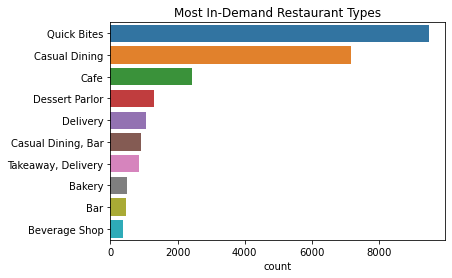

In [14]:
r_type=zomato['rest_type'].value_counts()[:10]
sns.barplot(x=r_type,y=r_type.index)
plt.title("Most In-Demand Restaurant Types")
plt.xlabel("count")

### Proportion of Restraunts that provide online service

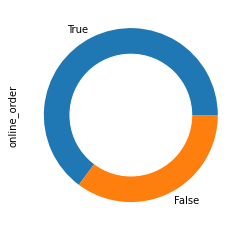

In [15]:
zomato.online_order.value_counts().plot(kind='pie')
w_circle=plt.Circle((0,0),0.7,color='white')
p=plt.gcf()
p.gca().add_artist(w_circle)

### Proportion of restraunts that allow booking tables

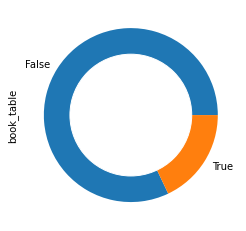

In [16]:
zomato.book_table.value_counts().plot(kind='pie')
w_circle=plt.Circle((0,0),0.7,color='white')
p=plt.gcf()
p.gca().add_artist(w_circle)

### Most popular restraurant chains

Text(0.5, 1.0, 'Top 10 Chain Restaurants')

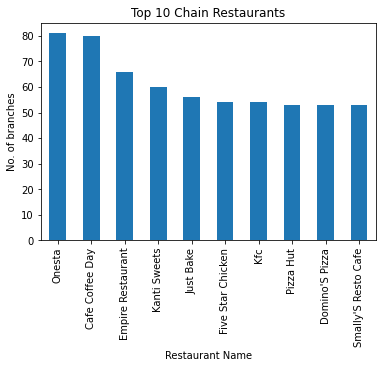

In [17]:
ax=zomato.name.value_counts()[:10].plot(kind='bar')
plt.xlabel("Restaurant Name")
plt.ylabel("No. of branches")
plt.title("Top 10 Chain Restaurants")

### Impact of Online Ordering on Ratings

It can be seen from the chart below that restaurants that allow ordering online tend to have higher ratings.

<AxesSubplot:xlabel='rating'>

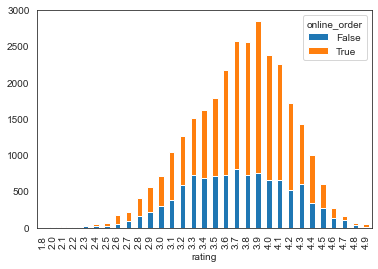

In [18]:
sns.set_style('white')
y=pd.crosstab(zomato.rating,zomato.online_order)
y.plot(kind='bar',stacked=True)

### Impact of Table Bookings on Ratings

It can be seen from the chart below that restaurants that allow table bookings tend to have higher ratings

<AxesSubplot:xlabel='rating'>

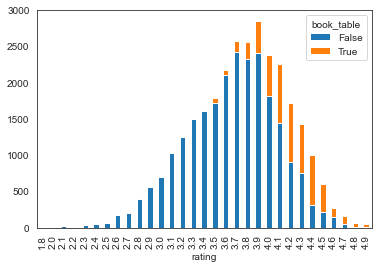

In [19]:
sns.set_style('white')
y=pd.crosstab(zomato.rating,zomato.book_table)
y.plot(kind='bar',stacked=True)

### Top 10 restaurants locations

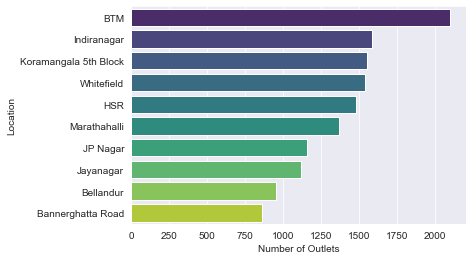

In [20]:
sns.set_style('darkgrid')
ch=zomato['location'].value_counts()[:10]
sns.barplot(x=ch,y=ch.index,palette='viridis')
plt.xlabel('Number of Outlets')
plt.ylabel('Location')
plt.show()

# 5. Correlation

How much different features are effecting other features.

In [21]:
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rating', 'cost', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

encodedZomato = Encode(zomato.copy())

### Next we try to plot a heatmap to get the correlation between the various available variables.

<AxesSubplot:>

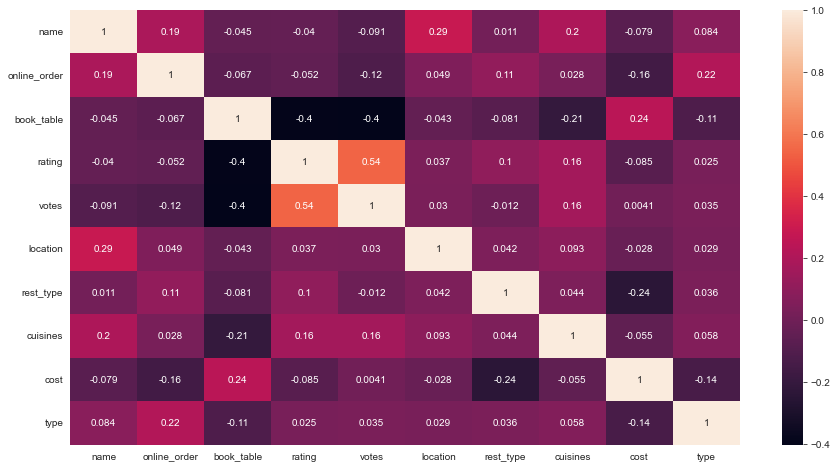

In [22]:
#Get Correlation between different variables
corr = encodedZomato.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

### 6. Splitting the Dataset

Next up is very important step of the deciding the train-test split for the different models. In this, after careful consideration, a train-test split of 4:1 is chosen. Also, the dependent and independent variables are declared for the models. The target variable here is rating which is what we aim to predict for future restaurants.

In [23]:
#Defining X and Y for model, Train-test split
x = encodedZomato[["online_order","book_table","votes","location","rest_type","cuisines","cost","type"]]
y = encodedZomato['rating']
#Getting Test and Training Set, change test_size to change the train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=353)
x_train.shape, y_train.shape

((23710, 8), (23710,))

# 7. Model Building and Evaluation

### 1. Linear Regression

In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables. The case of one explanatory variable is called simple linear regression.

In [24]:
regressor_LR = LinearRegression() # Linear Regression regressor
regressor_LR.fit(x_train,y_train) # fitting the dataset in the Linear Regression model/ training the model

LinearRegression()

In [25]:
y_pred_LR=regressor_LR.predict(x_test) # predicting the values of test dataset
r2_score_LR = r2_score(y_test,y_pred_LR) # getting the r2 score of the linear regression model
print(r2_score_LR)

0.3001334694342265


### 2. Decision Tree Regressor

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [26]:
regressor_DT = DecisionTreeRegressor(min_samples_leaf=.00001) # Decision Tree Regressor
regressor_DT.fit(x_train,y_train) # fitting the dataset in the Decision tree model

DecisionTreeRegressor(min_samples_leaf=1e-05)

In [27]:
y_pred_DT = regressor_DT.predict(x_test) # predicting the values of test dataset
r2_score_DT = r2_score(y_test,y_pred_DT) # getting the r2 score of the Decision Tree model
print(r2_score_DT)

0.8270662288181975


### 3. Random Forest Regressor

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [28]:
regressor_RF = RandomForestRegressor(n_estimators=200,random_state=50,min_samples_leaf=.00001) # Random Forest Regressor
regressor_RF.fit(x_train,y_train) # fitting the dataset in the Decision tree model

RandomForestRegressor(min_samples_leaf=1e-05, n_estimators=200, random_state=50)

In [29]:
y_pred_RF=regressor_RF.predict(x_test) # predicting the values of test dataset
r2_score_RF = r2_score(y_test,y_pred_RF) # getting the r2 score of the Random Forest model
print(r2_score_RF)

0.8874748259713594


### 4. XGBoost Regressor

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now.

In [30]:
regressor_XGB = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 15, n_estimators = 200) # XGBoost Regressor
regressor_XGB.fit(x_train, y_train) # fitting the dataset in the Decision tree model

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [31]:
y_pred_XGB = regressor_XGB.predict(x_test) # predicting the values of test dataset
r2_score_XGB = r2_score(y_test,y_pred_XGB) # getting the r2 score of the XGBoost model
print(r2_score_XGB)

0.9110254517565294


### 5. Gradient Boosting Regressor

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

In [32]:
regressor_GBR = GradientBoostingRegressor() # Gradient Boosting Regressor
regressor_GBR.fit(x_train, y_train) # fitting the dataset in the Gradient Boosting Model

GradientBoostingRegressor()

In [33]:
y_pred_GBR=regressor_GBR.predict(x_test) # predicting the values of test dataset
r2_score_GBR = r2_score(y_test,y_pred_GBR) # getting the r2 score of the Gradient Boosting model
print(r2_score_GBR)

0.5452178335332234


### 6. Extra Tree Regressor

Extra Trees Regressor is an ensemble learning method fundamentally based on decision trees. Extra Trees Regressor, like RandomForest, randomizes certain decisions and subsets of data to minimize over-learning from the data and overfitting

In [34]:
regressor_ET=ExtraTreesRegressor(n_estimators = 200) # Extra Tree Regressor
regressor_ET.fit(x_train,y_train) # fitting the dataset in the Extra Tree Model

ExtraTreesRegressor(n_estimators=200)

In [35]:
y_pred_ET=regressor_ET.predict(x_test) # predicting the values of test dataset
r2_score_ET = r2_score(y_test,y_pred_ET) # getting the r2 score of the Gradient Boosting model
print(r2_score_ET)

0.8918262510975058


# 8. Model Comparison based on R2 Score

In [36]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest','Extra Tree Regressor', 'Gradient Boost', 'XgBoost'],
    'Score' : [regressor_LR.score(x_test, y_test), regressor_DT.score(x_test, y_test), regressor_RF.score(x_test, y_test),regressor_ET.score(x_test, y_test),
               regressor_GBR.score(x_test, y_test), regressor_XGB.score(x_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,XgBoost,0.911025
3,Extra Tree Regressor,0.891826
2,Random Forest,0.887475
1,Decision Tree,0.827066
4,Gradient Boost,0.545218
0,Linear Regression,0.300133


### It is clear from the above table that we XgBoost is giving the best r2 score. 

# 9. Predicting Ratings for New Restaurants

In [37]:
# Add path to the prediction dataset directory
df_new = pd.read_csv('Zomato_predictions.csv')
#Converting cost to float
df_new['cost'] = df_new['cost'].astype(float)
df_new

,name,online_order,book_table,votes,location,rest_type,cuisines,cost,type
0,Madras Meal Company,True,False,400,Banashankari,"Casual Dining, Takeaway, Delivery","South Indian, Chettinad",400.0,Buffet
1,Dwarkamai,True,False,291,Banashankari,Casual Dining,"South Indian, Chinese, Street Food",690.0,Buffet
2,Great Indian Khichdi,True,True,1279,J P Nagar,"Casual Dining, Delivery","North Indian, Healthy Food",420.0,Buffet
3,Shiv Sagar Signature,False,False,705,J P Nagar,Casual Dining,"South Indian, Fast Food, Chinese",239.0,Buffet
4,Vesuvio,False,True,200,Bannerghatta Road,Fine Dining,Italian,1000.0,Dine-out
5,Lombard,False,True,35,Jayanagar,Casual Dining,"Italian, Spanish",900.0,Buffet
6,Xi Jumping!,True,True,69,Banashankari,"Casual Dining, Takeaway, Delivery","Chinese, Fast Food",200.0,Buffet
7,Andhra Gunpowder,True,True,975,Indiranagar,"Casual Dining, Takeaway, Delivery",Andhra,400.0,Buffet
8,Punjabi Nawabi,True,False,99,Indiranagar,"Casual Dining, Delivery","North Indian, Mughlai, Biryani",300.0,Buffet
9,Lo! - Low Carb and Keto Foods,True,False,333,Domlur,"Takeaway, Delivery","Rolls, American, Healthy Food",400.0,Delivery


In [38]:
zomatoNew = Encode(df_new.copy())
zomatoNew

,name,online_order,book_table,votes,location,rest_type,cuisines,cost,type
0,0,0,0,400,0,0,0,400.0,0
1,1,0,0,291,0,1,1,690.0,0
2,2,0,1,1279,1,2,2,420.0,0
3,3,1,0,705,1,1,3,239.0,0
4,4,1,1,200,2,3,4,1000.0,1
5,5,1,1,35,3,1,5,900.0,0
6,6,0,1,69,0,0,6,200.0,0
7,7,0,1,975,4,0,7,400.0,0
8,8,0,0,99,4,2,8,300.0,0
9,9,0,0,333,5,4,9,400.0,2


In [39]:
# To predict the ratings, change xgb to any one of rf, gbr, DTree, Etree, reg to try a different model
x_pred = zomatoNew[["online_order","book_table","votes","location","rest_type","cuisines","cost","type"]]
y_predict=regressor_XGB.predict(x_pred)
y_pred_list = [ round(elem, 1) for elem in y_predict ]
y_pred_list

[3.6, 3.8, 4.3, 4.2, 3.7, 3.1, 3.6, 3.7, 3.7, 4.0]

In [40]:
df_new["rating"] = y_pred_list
df_new

,name,online_order,book_table,votes,location,rest_type,cuisines,cost,type,rating
0,Madras Meal Company,True,False,400,Banashankari,"Casual Dining, Takeaway, Delivery","South Indian, Chettinad",400.0,Buffet,3.6
1,Dwarkamai,True,False,291,Banashankari,Casual Dining,"South Indian, Chinese, Street Food",690.0,Buffet,3.8
2,Great Indian Khichdi,True,True,1279,J P Nagar,"Casual Dining, Delivery","North Indian, Healthy Food",420.0,Buffet,4.3
3,Shiv Sagar Signature,False,False,705,J P Nagar,Casual Dining,"South Indian, Fast Food, Chinese",239.0,Buffet,4.2
4,Vesuvio,False,True,200,Bannerghatta Road,Fine Dining,Italian,1000.0,Dine-out,3.7
5,Lombard,False,True,35,Jayanagar,Casual Dining,"Italian, Spanish",900.0,Buffet,3.1
6,Xi Jumping!,True,True,69,Banashankari,"Casual Dining, Takeaway, Delivery","Chinese, Fast Food",200.0,Buffet,3.6
7,Andhra Gunpowder,True,True,975,Indiranagar,"Casual Dining, Takeaway, Delivery",Andhra,400.0,Buffet,3.7
8,Punjabi Nawabi,True,False,99,Indiranagar,"Casual Dining, Delivery","North Indian, Mughlai, Biryani",300.0,Buffet,3.7
9,Lo! - Low Carb and Keto Foods,True,False,333,Domlur,"Takeaway, Delivery","Rolls, American, Healthy Food",400.0,Delivery,4.0
